In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Step 1: Load the dataset
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Amazon Alex\amazon_alexa.tsv",sep='\t')

In [19]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [21]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [25]:
# Handle missing values in verified_reviews
data['verified_reviews'].fillna('No review', inplace=True)

In [27]:
data.duplicated().sum()

715

In [29]:
df = data.copy()
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

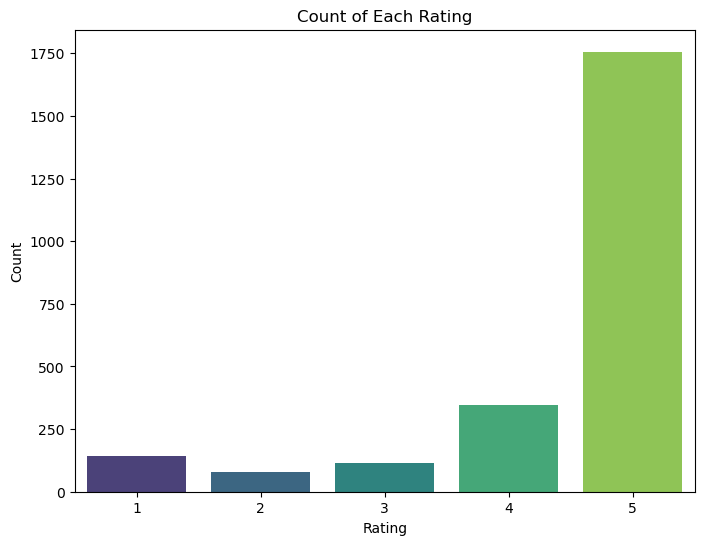

In [53]:
# 1. Bar Plot: Count of each rating
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

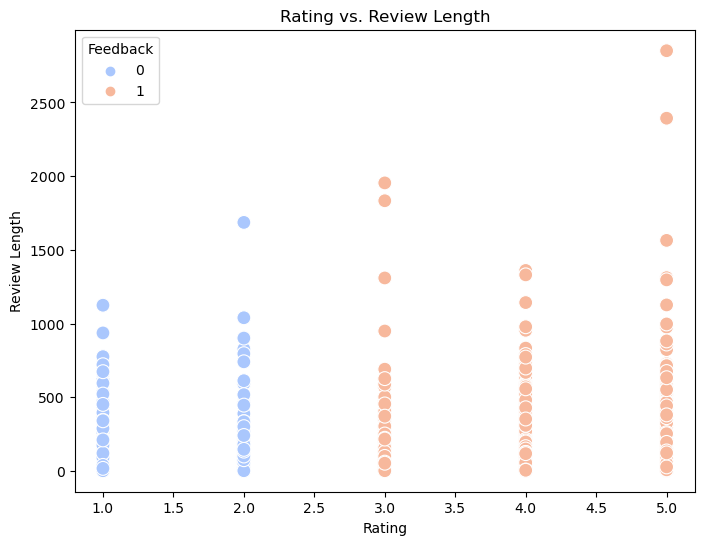

In [54]:
# 2. Scatter Plot: Rating vs. Review Length
df['review_length'] = df['verified_reviews'].apply(len)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='review_length', hue='feedback', data=df, palette='coolwarm', s=100)
plt.title('Rating vs. Review Length')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.legend(title='Feedback')
plt.show()

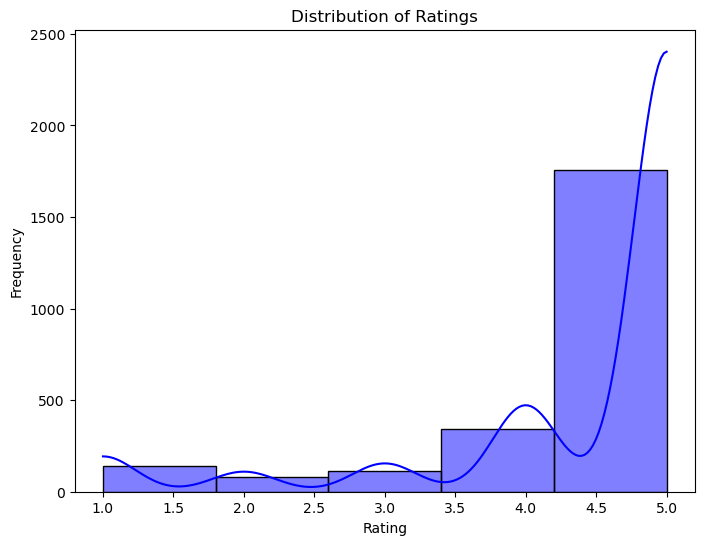

In [56]:
# 3. Histogram: Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [62]:
type(stopwords.words('english'))

list

In [68]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [70]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [72]:
# Apply preprocessing to the 'review' column
df['processed_review'] = df['verified_reviews'].apply(preprocess_text)

In [108]:
df.head(10)

,rating,date,variation,verified_reviews,feedback,review_length,processed_review,encoded_variation
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,5
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,loved,5
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes playing game answer question correct...,10
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learns dinosaur control l...,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,5
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,received echo gift needed another bluetooth so...,7
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,without cellphone use many feature ipad see us...,9
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221,think th one ive purchased im working getting ...,5
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11,look great,7
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114,love ive listened song havent heard since chil...,7


In [80]:
df[['verified_reviews','processed_review']].iloc[0]

verified_reviews    Love my Echo!
processed_review        love echo
Name: 0, dtype: object

In [82]:
# Encoding categorical data
label_encoder = LabelEncoder()
df['encoded_variation'] = label_encoder.fit_transform(df['variation'])

In [86]:
# Step 3: Split the dataset into training and testing sets
X = df['processed_review']
y = df['encoded_variation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Step 4: Create a pipeline with TfidfVectorizer and Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.7)),
    ('classifier', MultinomialNB())
])

In [90]:
# Step 5: Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, max_features=5000, min_df=5,
                                 ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [92]:
# Step 6: Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [94]:
# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.351129363449692

Confusion Matrix:
[[23  7  2  5  2  4 18  0  0  0  0  0  0  0  0  0]
 [ 4 11  8  5  2  4  4  0  0  0  0  0  0  0  0  0]
 [ 3  7 23  4  2  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  2  9 19  5  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  2  3 10 23  1 12  0  0  0  0  0  0  0  0  0]
 [ 4  7  9  6  1  9  9  0  0  0  0  0  0  0  0  0]
 [ 5  3  3  3  1  0 63  0  0  0  0  0  0  0  0  0]
 [ 0  5  2  0  0  2  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  2  1  1  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  7  2  1  1  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  6  3  0  1  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  3 10  1  0  2  2  0  0  0  0  0  0  0  0  0]
 [ 2  2  0  2  2  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  3  7  0  5  0  0  0  0  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        61
   

In [118]:
# Step 8: Test with new reviews
new_reviews = [
    "love echo.",
    "Terrible film. I hated every minute of it.",
    "An average movie, nothing special."
]

In [124]:
# Preprocess new reviews
processed_new_reviews = [preprocess_text(review) for review in new_reviews]

# Make predictions
new_predictions = pipeline.predict(processed_new_reviews)

for review, sentiment in zip(new_reviews, new_predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

Review: love echo.
Predicted Sentiment: 3

Review: Terrible film. I hated every minute of it.
Predicted Sentiment: 6

Review: An average movie, nothing special.
Predicted Sentiment: 6

